```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
#gpu
!pip install diffusers transformers safetensors accelerate

In [ ]:
import requests
from io import BytesIO
from PIL import Image
from diffusers import AutoPipelineForImage2Image
import matplotlib.pyplot as plt
import torch

# Diagram

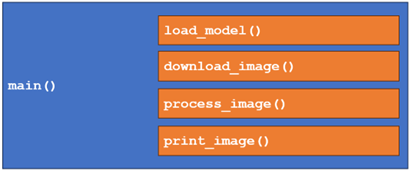

# Code

In [ ]:
def load_model(pretrained_model_or_path, device="cuda"):
    pipeline = AutoPipelineForImage2Image.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        use_safetensors=True,
        safety_checker=None
    ).to(device)
    return pipeline

In [ ]:
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    return image

In [ ]:
def process_image(pipeline, prompt, source_image, num_inference_steps):
    processed_image = pipeline(prompt, source_image, num_inference_steps=num_inference_steps).images[0]
    return processed_image

In [ ]:
def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
def main():
    pretrained_model_or_path = "runwayml/stable-diffusion-v1-5"
    prompt = "The woman when she was a child."
    num_inference_steps = 50
    url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

    pipeline = load_model(pretrained_model_or_path)
    source_image = download_image(url)
    processed_image = process_image(pipeline, prompt, source_image, num_inference_steps)
    print_image(processed_image)


# Execution

In [ ]:
main()